In [2]:
import numpy as np
from orphics import maps, cosmology,io,stats
import matplotlib.pyplot as plt

from scipy import optimize
import cosmo_cleaner
from cosmo_cleaner import fisher as fisher,plot
import camb
from cosmo_cleaner import cosmology
from cosmo_cleaner import triangle_plot
def get_corr(cross,f1,f2):
    return np.sqrt(cross**2/(f1*f2))
def get_der(spectra,pars,cleaned=False):
    """derivative function used for fisher"""
    der_spectra_alpha = np.ones((len(list(spectra.items())[0][1]), len(spectra), len(pars)))
    for i in range(len(pars)):
        print(f"Taking field derivatives wrt {pars[i]}")
        der=cosmology.derivative_parameter(ells,1,0.5,defaultCosmology,pars[i],delta=0.00005)
        der_spectra_alpha[:, 0, i] = der[1][:cut]
        der_spectra_alpha[:, 1, i] = der[0][:cut]
        if cleaned==True:
            der_spectra_alpha[:, 2, i] = der[-1][:cut]
        else:
            der_spectra_alpha[:, 2, i] = der[2][:cut]
    return der_spectra_alpha


Load the default cosmology, for the dafault calculations, we let the $k_{max}=10Mpc^{-1}$ this is used to compute the linear power spectrum.

In [3]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':1,'A_l':1.,'A_e':1}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1

nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
#pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)

In [4]:
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)
fiducial_cls=default.get_lsst_lensing(lenszmin=0,lmax=3000)

In [5]:
len(fiducial_cls[0]['kk'])

3000

Plot the fiducial $C^{g_ig_i}_\ell$ and the shot noise level with an average galaxy density of $\bar{n}=40arcmin^{-2}$

$n(z)=\frac{A}{2z_0}\Big(\frac{z}{z_0}\Big)^2e^{-z/z_0}$ with z_0=0.3

In [14]:
bin_centers=[]
for i in range(len(default.LSST_z)):
    bin_centers.append(np.mean(default.LSST_z[i]))
bin_centers=np.array(bin_centers)
A=40/np.sum(default.dn_dz_LSST(bin_centers))

calculate the normalization

In [22]:
A=40/np.sum(default.dn_dz_LSST(bin_centers))

calculate the number density in each bin

In [23]:
default.dn_dz_LSST(bin_centers)

array([1.31586519e-01, 6.12109664e-01, 8.74131786e-01, 8.79930820e-01,
       7.47220802e-01, 5.73201649e-01, 4.11092806e-01, 2.80747792e-01,
       1.85340503e-01, 1.18871281e-01, 6.61547719e-02, 3.15645891e-02,
       1.28551114e-02, 3.86461522e-03, 9.71842207e-04, 6.12224881e-06])

In [8]:
n_i[0]

NameError: name 'n_i' is not defined

In [24]:
n_i=A*default.dn_dz_LSST(bin_centers)

use integral to calculate the number density instead

In [25]:
zs=default.LSST_z

In [27]:
n_int=[]
for i in range(16):
    n_int.append(40*np.trapz(default.dn_dz_LSST(zs[i]),zs[i]))
n_int=np.array(n_int)

In [28]:
np.sum(n_i)

40.0

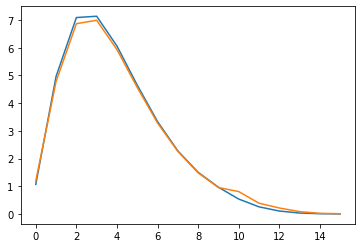

In [29]:
plt.plot(n_i)
plt.plot(n_int)

In [25]:
noise_av=np.ones(3000)/40
noise_av*= (np.pi/60./180.)**2 #convert from arcmin**2 to rad**2

/global/homes/j/jia_qu/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


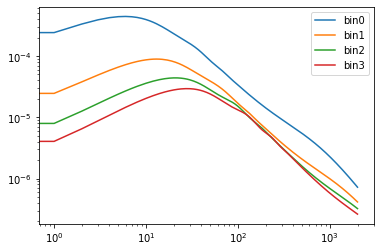

In [27]:
plt.semilogy(fiducial_cls[0]['g0g0'],label='bin0')
plt.loglog(fiducial_cls[0]['g1g1'],label='bin1')
plt.loglog(fiducial_cls[0]['g2g2'],label='bin2')
plt.loglog(fiducial_cls[0]['g3g3'],label='bin3')
#plt.plot(noise,label='noise')
plt.xlim(0,3000)
plt.legend()

In [28]:
bin_centers=[]
for i in range(len(default.LSST_z)):
    bin_centers.append(np.mean(default.LSST_z[i]))
bin_centers=np.array(bin_centers)

In [29]:
ell=np.arange(len(fiducial_cls[0]['kk']))

In [30]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':1,'A_l':1,'A_e':1}

In [34]:
from tqdm import tqdm
pars = ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu']
for i in range(16):
    pars.append(f'lsst_bias{i}')
#pars = ['mnu']
Npars = len(pars)
cut=3000
ells=np.arange(cut)
der_spectra_alpha = np.ones((cut, len(fiducial_cls[0]), Npars))



In [365]:
len(np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives.npy",allow_pickle=True))


1

In [83]:
der=np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives1new.npy",allow_pickle=True)

In [33]:
s4noise=np.loadtxt("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/nlkks4.txt")

In [368]:
a=cosmology.LSSTxlensing(fiducial_cls[0],fiducial_cls[0],der,pars,s4noise,0.4,l_min=0,l_max=2000,nbar=40)


In [51]:
n=[]
for i in range(len(n_i)):
    n.append(np.ones(3000)*n_i[i])

In [36]:
n_new=[]
for i in range(len(n_int)):
    n_new.append(np.ones(3000)*n_int[i])
n_new=np.array(n_new)

In [9]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':1,'A_l':1,'A_e':1}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1

nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
#pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)


default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)
fiducial_cls=default.get_lsst_lensing(lenszmin=0)

print(fiducial_cls)
from tqdm import tqdm
pars = ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu']
for i in range(16):
    pars.append(f'lsst_bias{i}')
Npars = len(pars)




#take the derivatives of spectra over the parameters
Npars=23
derivative=[]
left_steps = [0.0008, 0.003,   0.2,   0.01e-9, 0.005, 0.02, 0.0]
right_steps = [0.0008, 0.003,   0.2,   0.01e-9, 0.005, 0.02, 0.02]
for i in range(16):
    left_steps.append(0.01)
    right_steps.append(0.01)
deltas=[]
for i in range(len(left_steps)):
    deltas.append((left_steps[i],right_steps[i]))

for task in range(Npars):
    print(task)
    der=cosmology.LSST_derivative_parameter(defaultCosmology,pars[task],deltas[task],kmax=kmax)
    derivative.append(der)
#np.save("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives1.npy",derivative1)
derdict=[]



({'g0g0': array([9.91214804e-05, 2.41242815e-04, 3.32696185e-04, ...,
       7.23585721e-07, 7.22933300e-07, 7.22281728e-07]), 'g1g1': array([8.91463204e-06, 2.45593806e-05, 3.78156894e-05, ...,
       4.15252255e-07, 4.14947093e-07, 4.14642241e-07]), 'g2g2': array([2.81132337e-06, 7.94040617e-06, 1.25847798e-05, ...,
       3.23666961e-07, 3.23476141e-07, 3.23285489e-07]), 'g3g3': array([1.41945602e-06, 4.04398918e-06, 6.48339634e-06, ...,
       2.62886699e-07, 2.62743657e-07, 2.62600759e-07]), 'g4g4': array([9.62800977e-07, 2.75386613e-06, 4.44035600e-06, ...,
       2.39794926e-07, 2.39658484e-07, 2.39522201e-07]), 'g5g5': array([7.22141458e-07, 2.07011900e-06, 3.34933515e-06, ...,
       2.24992525e-07, 2.24852740e-07, 2.24713134e-07]), 'g6g6': array([5.78342932e-07, 1.66017011e-06, 2.69201243e-06, ...,
       2.16245151e-07, 2.16098466e-07, 2.15951977e-07]), 'g7g7': array([4.95363272e-07, 1.42325472e-06, 2.31134642e-06, ...,
       2.16264643e-07, 2.16106715e-07, 2.15949004e-07])

In [10]:
np.save("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives110421.npy",derivative)


In [34]:
import itertools
class LSSTxlensing():
    """
    Class for computing Fisher matrices from LSSTxlensing.

    """

    def __init__(self, fid,spectra,der_spectra,pars,lensingnoise,lbmax,n,f_sky=0.65, l_min=10, l_max=1000):
        self.f_sky = f_sky
        self.spectra=spectra
        self.der_spectra=der_spectra
        self.fid=fid
        self.pars=pars
        self.Npars=len(self.pars)
        self.ells = np.arange(l_min,l_max)
        self.l_min = l_min
        self.l_max = l_max
        self.shotnoise=1/n
        #convert shotnoise from arcmin^2 to rad^2
        self.shotnoise*= (np.pi/60./180.)**2
        self.noise_list=[]
        self.cross_noise=[]
        self.lbmax=lbmax
        for i in range(16):
            noise=self.shotnoise[i].copy()
            crossnoise=np.zeros(3000)
            noise[int(lbmax[i]):]=1e100
            crossnoise[int(lbmax[i]):]=1e100
            self.noise_list.append(noise)
            self.cross_noise.append(crossnoise)
        self.lensingnoise=lensingnoise


    def get_modes(self):
        deltaL=np.zeros(len(self.ells))
        deltaL[0]=self.ells[0]-0
        deltaL[1:]=self.ells[1:]-self.ells[:-1] 
        result = (2*self.ells*deltaL*self.f_sky)
        return 1/result

    def get_Cl(self,X,Y):
        """X:g,k
           Y:gi,g
        """
        kappa_noise=(self.lensingnoise[self.l_min:self.l_max]+self.fid[f'kk'][self.l_min:self.l_max])*np.sqrt(self.get_modes())
        if X+Y in [f'g{i}g{i}' for i in range(16)]:
            j=int(X[1])
            Cl=self.fid[f'{X+Y}'][self.l_min:self.l_max]+self.noise_list[j][self.l_min:self.l_max]
        elif Y+X in [f'g{i}g{i}' for i in range(16)]:
            j=int(X[1])
            Cl=self.fid[f'{Y+X}'][self.l_min:self.l_max]+self.noise_list[j][self.l_min:self.l_max]
        elif X+Y in [f'kg{i}' for i in range(16)]:
            j=int(Y[1])
            Cl=self.fid[f'{X+Y}'][self.l_min:self.l_max]
            Cl=self.fid[f'{X+Y}'][self.l_min:self.l_max]+self.cross_noise[j][self.l_min:self.l_max]
        elif Y+X in [f'kg{i}' for i in range(16)]:
            j=int(X[1])
            Cl=self.fid[f'{Y+X}'][self.l_min:self.l_max]
            Cl=self.fid[f'{Y+X}'][self.l_min:self.l_max]+self.cross_noise[j][self.l_min:self.l_max]
        elif X+Y in ['kk']:
            Cl=self.fid[f'kk'][self.l_min:self.l_max]+kappa_noise[self.l_min:self.l_max]
        else:
            #print("cross cls not present")
            Cl=np.ones(len(self.ells))*0
        return Cl

    def get_derCl(self,der,X,Y):
        """X:g,k
           Y:gi,g
        """
        if X+Y in [f'g{i}g{i}' for i in range(16)]:
            j=int(X[1])
            Cl=der[f'{X+Y}']
            Cl[int(self.lbmax[j]):]=0.
            Cl=Cl[self.l_min:self.l_max]
            #Cl=der[f'{X+Y}'][self.l_min:self.l_max]
        
        elif Y+X in [f'g{i}g{i}' for i in range(16)]:
            j=int(X[1])
            Cl=der[f'{Y+X}']
            Cl[int(self.lbmax[j]):]=0.
            Cl=Cl[self.l_min:self.l_max]
            
            #Cl=der[f'{Y+X}'][self.l_min:self.l_max]
        elif X+Y in [f'kg{i}' for i in range(16)]:
            j=int(Y[1])
            Cl=der[f'{X+Y}']
            Cl[int(self.lbmax[j]):]=0.
            Cl=Cl[self.l_min:self.l_max]           
            #Cl=der[f'{X+Y}'][self.l_min:self.l_max]
        elif Y+X in [f'kg{i}' for i in range(16)]:
            j=int(X[1])
            Cl=der[f'{Y+X}']
            Cl[int(self.lbmax[j]):]=0.
            Cl=Cl[self.l_min:self.l_max] 
            #Cl=der[f'{Y+X}'][self.l_min:self.l_max]
        elif X+Y in ['kk']:
            Cl=der[f'kk'][self.l_min:self.l_max]
        else:
            Cl=np.ones(len(self.ells))*0
        return Cl

    def get_cov(self,X,Y,W,Z):
            return self.get_modes()*(self.get_Cl(X,W)*self.get_Cl(Y,Z)+self.get_Cl(X,Z)*self.get_Cl(Y,W))

    
    def get_covmatnew(self):
        """use this one"""
        lista = [f'g{i}' for i in range(16)]
        lista.append('k')
        allcombs = list(itertools.combinations_with_replacement(lista, 2))
        self.covmat=np.zeros((len(self.ells),len(allcombs),len(allcombs)))
        self.cov_dict = {}
        for cA in allcombs:
            for cB in allcombs:
                a, b = cA
                c, d = cB
                i, j = allcombs.index(cA), allcombs.index(cB)
                self.covmat[:,i,j]=self.get_cov(a, b, c, d)
                self.cov_dict[a+b+c+d]= self.covmat[:,i,j]
        return self.covmat
    
    def prepare_derivatives(self):
        lista = [f'g{i}' for i in range(16)]
        lista.append('k')
        allcombs = list(itertools.combinations_with_replacement(lista, 2))
        der_spectra_alpha = np.ones((len(self.ells), len(allcombs), self.Npars))
        for i in range(self.Npars):
            for cA in allcombs:
                    a, b = cA
                    ind= allcombs.index(cA)
                    der_spectra_alpha[:,ind,i]=self.get_derCl(self.der_spectra[i],a,b)
        return der_spectra_alpha
    
    
    def get_fisher(self):
        lista = [f'g{i}' for i in range(16)]
        lista.append('k')
        allcombs = list(itertools.combinations_with_replacement(lista, 2))     
        #derivatives check shape (ells,len(spectra),len(pars))
        derivatives=self.prepare_derivatives()
        assert(derivatives.shape[0] == len(self.ells)) 
        assert(derivatives.shape[1] == len(allcombs)) 
        assert(derivatives.shape[2] == self.Npars)
        fisher_per_mode = np.einsum('...ik, ...ij, ...jm -> ...km',derivatives, np.nan_to_num(np.linalg.inv(self.get_covmatnew())), derivatives)
        self.fisher_per_mode=fisher_per_mode
        self.error_per_mode_non_marginalized = np.nan_to_num(np.diagonal(fisher_per_mode,axis1 = 1, axis2 = 2)**-0.5)
        self.fisher=np.sum(self.fisher_per_mode,axis=0)
        return self.fisher

In [1]:
der=np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives110421.npy" ,allow_pickle=True)



NameError: name 'np' is not defined

In [57]:
for i in range(len(der[0])):
    print(len(der[0][i]))

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
3000


In [17]:
derdict=[]

for i in range(len(der)):
    derdict.append(cosmology.arraytodict(der[i]))

In [18]:
derold=np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivatives1new.npy",allow_pickle=True)

In [19]:
derold[0]['g1g1']

array([-0.00889056, -0.02381941, -0.0355239 , ..., -0.0006365 ,
       -0.000636  , -0.00063551])

In [20]:
derdict[0]['g1g1']

array([-1.97815009e-04, -5.29981766e-04, -7.90406845e-04, ...,
       -1.41621919e-05, -1.41511046e-05, -1.41400295e-05])

In [95]:
der[0]['g0g0']

array([-0.06120974, -0.14027266, -0.18498821, ...,  0.        ,
        0.        ,  0.        ])

In [38]:
pars = ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu']
for i in range(16):
    pars.append(f'lsst_bias{i}')
Npars = len(pars)




#take the derivatives of spectra over the parameters
Npars=23
derivative=[]
left_steps = [0.0008, 0.003,   0.2,   0.01e-9, 0.005, 0.02, 0.0]
right_steps = [0.0008, 0.003,   0.2,   0.01e-9, 0.005, 0.02, 0.02]
for i in range(16):
    left_steps.append(0.01)
    right_steps.append(0.01)
deltas=[]
for i in range(len(left_steps)):
    deltas.append((left_steps[i],right_steps[i]))


In [50]:
a=LSSTxlensing(fiducial_cls[0],fiducial_cls[0],derdict,pars,s4noise,0.05*default.results.comoving_radial_distance(bin_centers),n_new
,f_sky=0.4,l_min=0,l_max=3000)





In [51]:
fisher=a.get_fisher()
cov=np.linalg.inv(fisher)

ValueError: could not broadcast input array from shape (2000,) into shape (3000,)

In [52]:
(np.diag(cov)**0.5)

array([8.65542675e-03, 3.01875106e-02, 7.17907282e+00, 9.14053321e-09,
       1.12341255e-01, 3.21755949e+02, 3.42453382e-01, 2.08685954e+00,
       2.08238275e+00, 2.12858491e+00, 2.12177840e+00, 2.14805336e+00,
       2.12919839e+00, 2.12343511e+00, 2.10066554e+00, 2.19999627e+00,
       2.16945916e+00, 2.20534676e+00, 2.11413016e+00, 2.10261906e+00,
       2.20224010e+00, 2.23174697e+00, 2.16987073e+00])

In [53]:
(np.diag(cov)**0.5)[6]*1000

342.45338189507754

In [ ]:
309.38158682499534


In [158]:
6.65929610e+01,

(66.592961,)

In [406]:
parameters=['H0','ombh2','omch2','ns','As','tau','mnu']
fiducial=[67.3,0.02225,0.1198,0.9645,2.2e-9,0.06,0.06]

In [407]:
b=[307,176,107,84,79]
f=[215,105,51,28.5,22.87]
f0=[445,267,179,175,171.7]

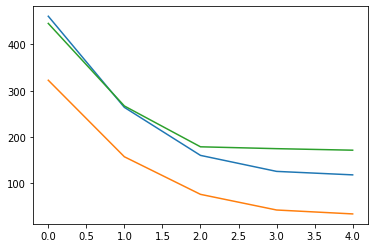

In [408]:
plt.plot(np.array(b)*1.5)
plt.plot(np.array(f)*1.5)
plt.plot(np.array(f0))

(0.0003211400849545571, 6.002705742378891e-06, -4.3240907005618144e-11)

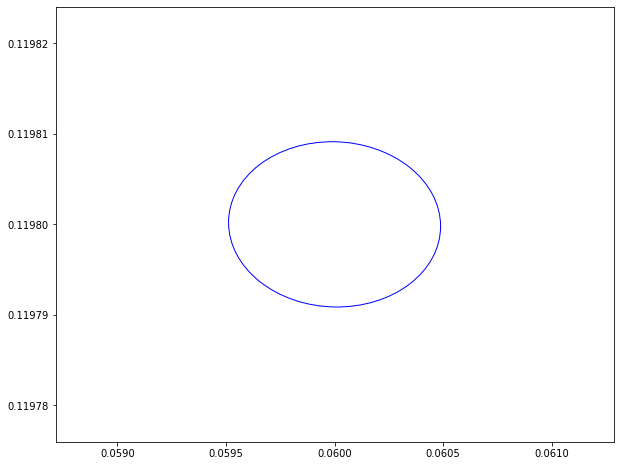

In [77]:
single_fig, single_ax = plt.subplots(figsize=(10,8))
triangle_plot.plot_ellipse(single_ax, 'mnu', 'omch2', parameters, fiducial,cov,kwargs1={'ls': '-'}, one_sigma_only=True)


In [3]:
deep6_file_name = "/global/cscratch1/sd/jia_qu/maps/newdata/stage_auto/kappalmsTT_lmin600_lmax3000_alm.fits"

In [ ]:
from pixell import endmp

In [72]:
fig, axes = triangle_plot.plot_triangle_base(parameters,fiducial,cov , one_sigma_only=True,color_1d='red',ellipse_kwargs1={'ls': '-', 'edgecolor': 'red'})
plt.savefig('highz.png')


NameError: name 'parameters' is not defined

In [ ]:
#does cleaning on clkk improve the constraints?

In [39]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':1,'A_l':1,'A_e':1}


nz = 1000
kmax = 19
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)
fiducial_cls=default.get_lsst_lensing(lenszmin=0.3)
pars = ['H0','ombh2','omch2','ns','As','tau','mnu']#, 's'
#pars = ['mnu']
Npars = len(pars)
cut=400
ells=np.arange(cut)
der_spectra_alpha = np.ones((cut, len(fiducial_cls[0]), Npars))

#take the derivatives of spectra over the parameters
derivativesclean=[]
for i in range(len(pars)):
    print(pars[i])
    derivativesclean.append(cosmology.LSST_derivative_parameter(defaultCosmology,pars[i],lenszmin=0.3))

KeyError: 'lsst_bias0'

In [30]:
a=cosmology.LSSTxlensing(fiducial_cls[0],fiducial_cls[0],derivativesclean,pars,s4noise,0.4,l_min=0,l_max=500,nbar=40)
fisherclean=a.get_fisher()
covclean=np.linalg.inv(fisherclean)

/global/u1/j/jia_qu/cosmo_cleaner/cosmo_cleaner/cosmology.py:838: RuntimeWarning: divide by zero encountered in true_divide
  return 1/result
/global/u1/j/jia_qu/cosmo_cleaner/cosmo_cleaner/cosmology.py:880: RuntimeWarning: invalid value encountered in multiply
  return self.get_modes()*(self.get_Cl(X,W)*self.get_Cl(Y,Z)+self.get_Cl(X,Z)*self.get_Cl(Y,W))


[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 5.90234488e-03 -1.10671563e+01 -2.55553859e+00 ...  7.97051556e+07
    3.25739900e-04 -1.44338584e-03]
  [-1.10671563e+01  1.45467041e+05  2.03095767e+04 ... -1.31063583e+11
   -1.58147966e+00 -1.09841386e+01]
  [-2.55553859e+00  2.03095767e+04  5.42025161e+03 ... -2.93260006e+10
   -1.45290543e-01  1.00475336e+00]
  ...
  [ 7.97051556e+07 -1.3

/global/u1/j/jia_qu/cosmo_cleaner/cosmo_cleaner/cosmology.py:948: RuntimeWarning: divide by zero encountered in power
  self.error_per_mode_non_marginalized = np.nan_to_num(np.diagonal(fisher_per_mode,axis1 = 1, axis2 = 2)**-0.5)


In [33]:
np.diag(covclean)**0.5 

array([9.11476259e-02, 1.21243540e-05, 6.31907469e-05, 3.13869444e-03,
       6.90592391e-12, 1.92659967e+00, 1.85829796e-02])

generating new axis
['$\\mathrm{H0}$', '$\\mathrm{ombh2}$', '$\\mathrm{omch2}$', '$\\mathrm{ns}$', '$\\mathrm{As}$', '$\\mathrm{tau}$', '$\\mathrm{mnu}$']
['$\\mathrm{H0}$', '$\\mathrm{ombh2}$', '$\\mathrm{omch2}$', '$\\mathrm{ns}$', '$\\mathrm{As}$', '$\\mathrm{tau}$', '$\\mathrm{mnu}$']


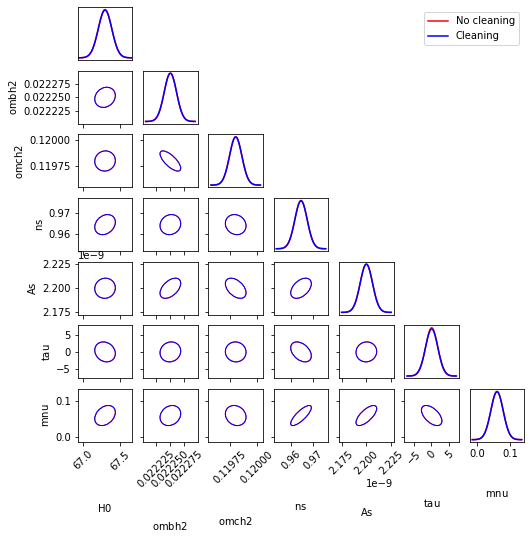

In [34]:
fig, axes = triangle_plot.plot_triangle_base(parameters,fiducial,cov , one_sigma_only=True,color_1d='red',ellipse_kwargs1={'ls': '-', 'edgecolor': 'red'})
# now plot a slightly cleaned instrument
triangle_plot.plot_triangle_base(parameters,fiducial, covclean, one_sigma_only=True,
                                  f=fig, ax=axes,
                                  ellipse_kwargs1={'ls': '-', 'edgecolor': 'blue'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'blue'},
                                  color_1d='blue'
                                 );

l1, = axes[0, -1].plot([],[],'-',color="red", label='No cleaning')
l2, = axes[0, -1].plot([],[],'-',color="blue", label='Cleaning')
axes[0, -1].legend()